In [1]:
import torch

/Users/simpson.tls/opt/anaconda3/envs/torch_py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## STEP 1. 데이터 만들기

In [2]:
# case 1
# N=20
# random0=torch.randn(int(N/2),1)
# random5=torch.randn(int(N/2),1)+5
# class1_data=torch.hstack([random0,random5])
# class2_data=torch.hstack([random5,random0])
# class1_label=torch.ones(int(N/2),1)
# class2_label=torch.zeros(int(N/2),1)
# X=torch.vstack([class1_data,class2_data])
# y=torch.vstack([class1_label,class2_label])

# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

In [3]:
print(X)
print(y)

tensor([[-1.4905e-01, -1.6694e-01],
        [-1.4394e-01, -2.6642e-01],
        [ 1.7247e-01,  1.7042e-01],
        [ 1.0367e-01, -3.3201e-01],
        [-1.6850e-01, -1.6573e-01],
        [-2.5400e-01,  7.9882e-02],
        [ 1.4956e-01, -2.8747e-01],
        [-4.3428e-02,  2.6200e-01],
        [ 2.7029e-01,  1.0189e-01],
        [ 8.5231e-02,  2.1396e-01],
        [ 1.6937e-01,  2.6378e-01],
        [ 1.8972e-01,  1.5904e-01],
        [-3.4825e-01,  6.2322e-03],
        [ 3.0182e-01, -1.3877e-01],
        [-2.8554e-01, -8.1232e-02],
        [-1.8035e-01,  1.2887e-01],
        [ 1.9129e-01, -1.4649e-01],
        [ 2.6957e-01,  8.2780e-03],
        [-2.3606e-01,  9.1935e-02],
        [ 2.7192e-01, -3.5139e-02],
        [-9.6004e-02, -1.6743e-01],
        [-2.0878e-01, -2.7680e-02],
        [-3.3770e-01, -9.0467e-02],
        [ 4.1186e-02, -3.1504e-01],
        [ 1.8024e-01,  1.2544e-01],
        [ 1.2058e-01,  2.3096e-01],
        [ 1.6417e-01, -2.6797e-01],
        [-1.4403e-01, -2.805

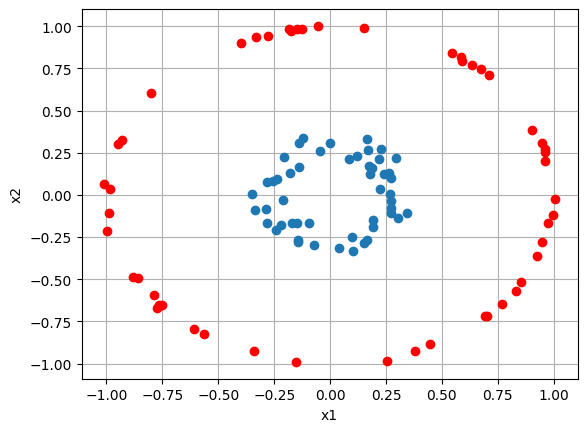

In [4]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

## STEP 2. 모델 만들기

In [5]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case 1, plain
        self.linear = nn.Sequential(nn.Linear(2,100), # 첫 채널이 2인 이유 ? 키와 몸무게 즉 2개의 특성을 가지고 있기 때문에
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid()) # 마지막 채널이 1인 이유 ? 0과 1로 분류하기 때문에
        
        # case 1, very simple
        self.linear = nn.Sequential(nn.Linear(2,1),
                                    nn.Sigmoid())
        
        # case 1, deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        # 결과를 보고 모델을 유기적으로 바꿔보자
    
        # case 2, plain
        self.linear = nn.Sequential(nn.Linear(2,1000),
                                    nn.Sigmoid(),
                                    nn.Linear(1000,1),
                                    nn.Sigmoid())
        
        # case 2, very simple
        self.linear = nn.Sequential(nn.Linear(2,1),
                                    nn.Sigmoid())
        
        # case 2, deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,100),
                                    nn.Sigmoid(),
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
        # case 2, very deep
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    *[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
        # case 2, very deep relu
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.ReLU(),
                                    *[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
        
    def forward(self, x):
        x = self.linear(x)
        return x

### 리스트 표현식으로, 반복되는 모델을 효율적으로 작성하기


In [6]:
# nn.Sequential(*[nn.Sequential(nn.Linear(100,100), nn.Sigmoid()) for _ in range(10)])
# nn.Sequential(*[nn.Linear(100,100) if i % 2 == 0 else nn.Sigmoid() for i in range(20)])
# nn.Sequential(*[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]])

In [7]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): ReLU()
    (10): Linear(in_features=100, out_features=100, bias=True)
    (11): ReLU()
    (12): Linear(in_features=100, out_features=100, bias=True)
    (13): ReLU()
    (14): Linear(in_features=100, out_features=100, bias=True)
    (15): ReLU()
    (16): Linear(in_features=100, out_features=100, bias=True)
    (17): ReLU()
    (18): Linear(in_features=100, out_features=100, bias=True)
    (19): ReLU()
    (20): Linear(in_features=100, out_features=100, bias=True)
    (21): ReLU()
    (22): Linear(in_features=100, out_features=1, bias=True)
    (23): Sigmoid()
  )
)
torch.Size([5, 1

## STEP 3. 모델 학습시키기

In [9]:
from torch import optim
import torch.nn.functional as F

# LR = 1e-1 # case 1
LR = 1e-2 # case 2, plain 에서 노드 천 개, deep
LR = 1e-4
# LR = 1e-6
# EPOCH = 100
EPOCH = 500 # case 2, plain 에서 노드 천 개, deep

optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history = []

model.train() # train mode로 전환
for ep in range(EPOCH):
    # inference
    y_hat = model(X)
    # loss
    loss = F.binary_cross_entropy(y_hat, y) # True label과 예측값을 비교하여 loss 계산
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # back propagation, 즉 loss를 미분한 gradient를 계산
    optimizer.step() # weight update
    # print loss
    loss_history += [loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch: 1, train loss: 0.693
--------------------
Epoch: 2, train loss: 0.693
--------------------
Epoch: 3, train loss: 0.693
--------------------
Epoch: 4, train loss: 0.693
--------------------
Epoch: 5, train loss: 0.693
--------------------
Epoch: 6, train loss: 0.693
--------------------
Epoch: 7, train loss: 0.693
--------------------
Epoch: 8, train loss: 0.693
--------------------
Epoch: 9, train loss: 0.693
--------------------
Epoch: 10, train loss: 0.693
--------------------
Epoch: 11, train loss: 0.693
--------------------
Epoch: 12, train loss: 0.693
--------------------
Epoch: 13, train loss: 0.693
--------------------
Epoch: 14, train loss: 0.693
--------------------
Epoch: 15, train loss: 0.693
--------------------
Epoch: 16, train loss: 0.693
--------------------
Epoch: 17, train loss: 0.693
--------------------
Epoch: 18, train loss: 0.693
--------------------
Epoch: 19, train loss: 0.693
--------------------
Epoch: 20, train loss: 0.693
--------------------
Epoch: 21

In [10]:
# zerograd()를 해주지 않으면 gradient가 누적되어서 계속 더해진다.
# 그래서 매번 optimizer.step()을 하고 나면 optimizer.zero_grad()를 해줘야 한다.

x= torch.tensor([1.],requires_grad=True)
for _ in range(2):
    loss=x**2
    loss.backward()
    print(x.grad)
    x.grad = None

tensor([2.])
tensor([2.])


In [11]:
print(F.binary_cross_entropy(y_hat,y)) # loss를 구할 수 있는 라이브러리
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y)))/N) # loss 직접 구현
print(F.binary_cross_entropy(torch.tensor([0.]),torch.tensor([1.]))) # 100이 최대 loss라고 개발자가 정한 것

tensor(2.3292e-05, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(2.3292e-05, grad_fn=<DivBackward0>)
tensor(100.)


Text(0, 0.5, 'loss')

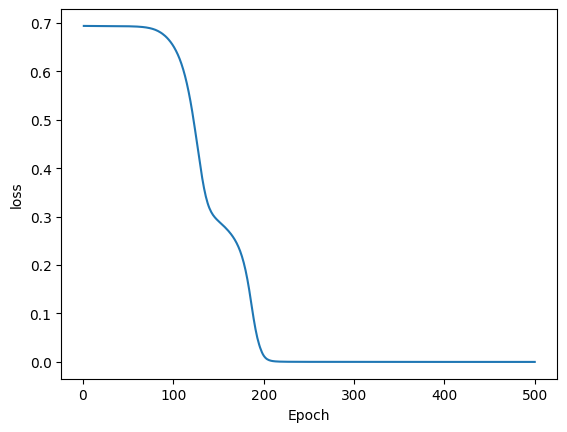

In [12]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel("Epoch")
plt.ylabel("loss")

## STEP 4. 모델 테스트하기

In [13]:
model.linear[0].weight.data.shape
model.linear[-2].weight.data.shape

torch.Size([1, 100])

/Users/simpson.tls/opt/anaconda3/envs/torch_py39/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Text(0.5, 0.5, 'x2')

/Users/simpson.tls/opt/anaconda3/envs/torch_py39/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/Users/simpson.tls/opt/anaconda3/envs/torch_py39/lib/python3.9/site-packages/mpl_toolkits/mplot3d/proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  re

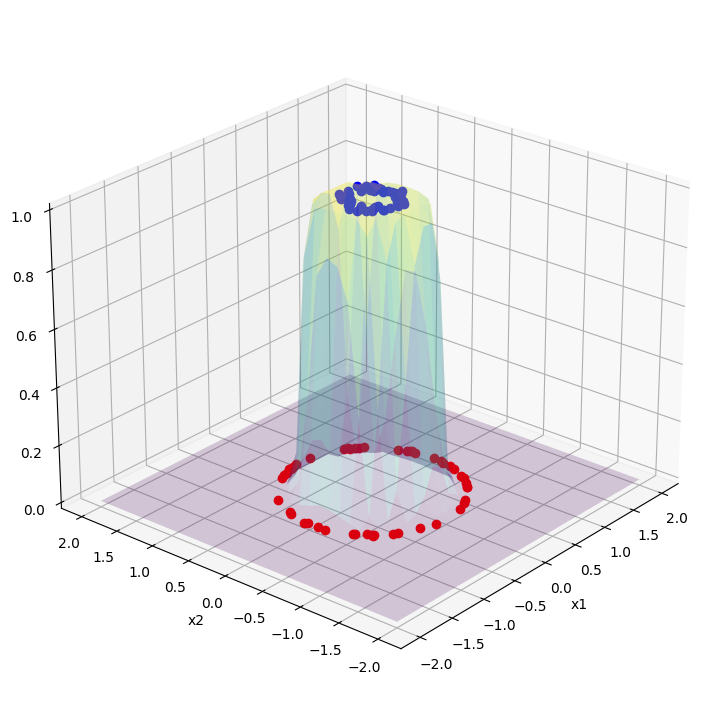

In [14]:
x1_test = torch.linspace(-10,10,30) # case 1
x2_test = torch.linspace(-10,10,30) # case 1
x1_test = torch.linspace(-2,2,30) # case 2 
x2_test = torch.linspace(-2,2,30) # case 2
X1_test, X2_test = torch.meshgrid(x1_test, x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2) # dim = 2인 이유? 3차원이기 때문에

model.eval() # test mode로 model을 바꿔준다. # 1
with torch.no_grad(): # 2
    y_hat = model(X_test)
# 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야 함
    # 예를들어, dropout은 확률적으로 랜덤하게 노드를 끄는 것이므로, test mode에서는 모든 노드를 켜줘야 함
# 2. grad_fn 계산은 메모리가 불필요하게 쓰이기 때문에, test mode에서는 grad_fn 계산을 하지 않게 하기 위함
Y_hat = y_hat.squeeze()

# print(model.training)
# model.train()
# print(model.training)

plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140)
ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [15]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)

# STEP 5. 자동화하기

Epoch: 1, train loss: 0.698
--------------------
Epoch: 2, train loss: 0.698
--------------------
Epoch: 3, train loss: 0.698
--------------------
Epoch: 4, train loss: 0.697
--------------------
Epoch: 5, train loss: 0.697
--------------------
Epoch: 6, train loss: 0.697
--------------------
Epoch: 7, train loss: 0.697
--------------------
Epoch: 8, train loss: 0.696
--------------------
Epoch: 9, train loss: 0.696
--------------------
Epoch: 10, train loss: 0.696
--------------------
Epoch: 11, train loss: 0.696
--------------------
Epoch: 12, train loss: 0.696
--------------------
Epoch: 13, train loss: 0.695
--------------------
Epoch: 14, train loss: 0.695
--------------------
Epoch: 15, train loss: 0.695
--------------------
Epoch: 16, train loss: 0.695
--------------------
Epoch: 17, train loss: 0.695
--------------------
Epoch: 18, train loss: 0.695
--------------------
Epoch: 19, train loss: 0.694
--------------------
Epoch: 20, train loss: 0.694
--------------------
Epoch: 21

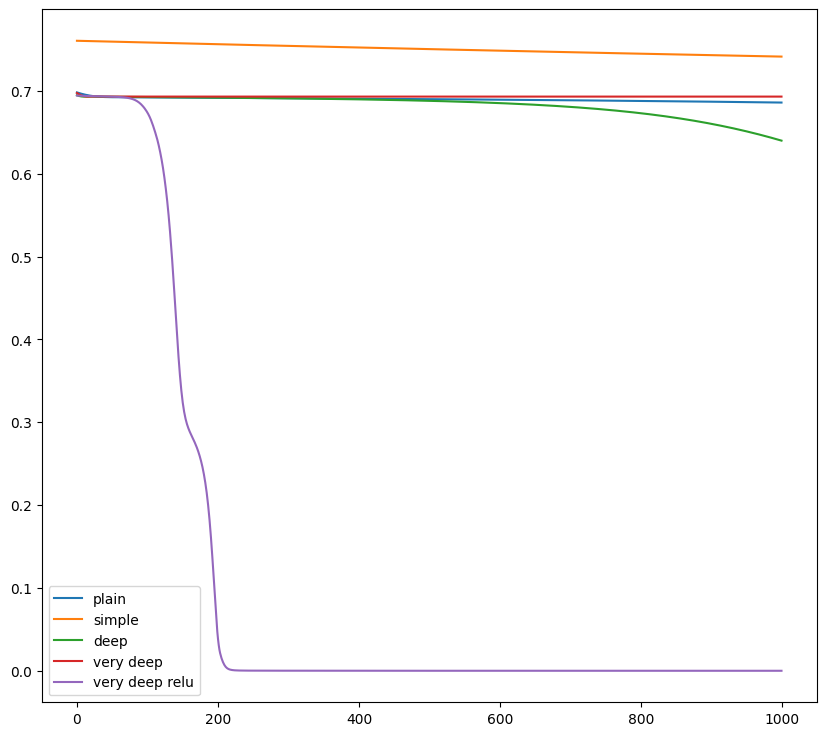

In [31]:
# 다양한 모델을 Input으로 받아서, 그 모델들의 성능을 비교해주는 함수를 구현해보자

def train_model(model, X,y, EPOCH=100, LR=1e-2, optimizer=optim.SGD):
    
    # optimizer = optim.SGD(model.parameters(), lr=LR)
    optimizer = optimizer(model.parameters(), lr=LR) # case 1, deep

    loss_history = []

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        # inference
        y_hat = model(X)
        # loss
        loss = F.binary_cross_entropy(y_hat, y)
        # update
        optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
        loss.backward() # backpropagation
        optimizer.step() # weight update
        # print loss
        loss_history += [loss.item()]
        print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
        print("-"*20)
    return loss_history

def test_model(model, X_test, y_test):
    model.eval() # test mode로 model을 바꿔준다. # 1
    with torch.no_grad(): # 2
        y_hat = model(X_test)
    # 1. dropout 혹은 BN 같은거 사용했다면 train mode와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야 함
        # dropout이 확률적으로 랜덤하게 노드를 끄는 것이므로, test mode에서는 모든 노드를 켜줘야 함
    # 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다 
    Y_hat = y_hat.squeeze()

    # accuracy
    y_hat = torch.where(y_hat>0.5, torch.tensor([1.]), torch.tensor([0.]))
    accuracy = (y_hat == y_test).sum().item() / len(y_test)
    print(f"test accuracy: {round(accuracy,3)}")

    return Y_hat

def plot_model(model, X_test, y_test):
    Y_hat = test_model(model, X_test, y_test)
    plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
    ax = plt.axes(projection="3d")
    ax.view_init(elev=25,azim=-140)
    ax.plot_surface(X1_test,X2_test,Y_hat.numpy(), cmap="viridis", alpha=0.2)
    plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
    plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


# case 2-1 : plain
class PlainNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2,100),
                                nn.Sigmoid(),
                                nn.Linear(100,1),
                                nn.Sigmoid())
    def forward(self,x):
        x = self.linear(x)
        return x

# case2-2 : simple
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2,1),
                                nn.Sigmoid())
    def forward(self,x):
        x = self.linear(x)
        return x

# case2-3 : deep
class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2,100),
                                nn.Sigmoid(),
                                nn.Linear(100,100),
                                nn.Sigmoid(),
                                nn.Linear(100,1),
                                nn.Sigmoid())
    def forward(self,x):
        x = self.linear(x)
        return x

# case2-4 : very deep
class veryDeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.Sigmoid(),
                                    *[i for _ in range(10) for i in [nn.Linear(100,100), nn.Sigmoid()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
    def forward(self,x):
        x = self.linear(x)
        return x
    
# case2-5 : very deep relu
class veryDeepNet_relu(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2,100),
                                    nn.ReLU(),
                                    *[i for _ in range(10) for i in [nn.Linear(100,100), nn.ReLU()]],
                                    nn.Linear(100,1),
                                    nn.Sigmoid())
    def forward(self,x):
        x = self.linear(x)
        return x
    

# compare models
plain_model = PlainNet()
simple_model = SimpleNet()
deep_model = DeepNet()
very_deep_model = veryDeepNet()
very_deep_model_relu = veryDeepNet_relu()

plain_loss = train_model(plain_model, X, y, EPOCH=1000, LR=1e-4, optimizer=optim.Adam)
simple_loss = train_model(simple_model, X, y, EPOCH=1000, LR=1e-4, optimizer=optim.Adam)
deep_loss = train_model(deep_model, X, y, EPOCH=1000, LR=1e-4, optimizer=optim.Adam)
very_deep_loss = train_model(very_deep_model, X, y, EPOCH=1000, LR=1e-4, optimizer=optim.Adam)
very_deep_loss_relu = train_model(very_deep_model_relu, X, y, EPOCH=1000, LR=1e-4, optimizer=optim.Adam)

# with label, to compare which color is which
# setting, without cutting graph

plt.figure(figsize=[10, 9])
plt.plot(plain_loss, label="plain")
plt.plot(simple_loss, label="simple")
plt.plot(deep_loss, label="deep")
plt.plot(very_deep_loss, label="very deep")
plt.plot(very_deep_loss_relu, label="very deep relu")
plt.legend()
plt.show()


In [30]:
# print all loss

print("plain loss : ", plain_loss[-1])
print("simple loss : ", simple_loss[-1])
print("deep loss : ", deep_loss[-1])
print("very deep loss : ", very_deep_loss[-1])
print("very deep loss relu : ", very_deep_loss_relu[-1])


plain loss :  0.6887943148612976
simple loss :  0.7021938562393188
deep loss :  0.6834837198257446
very deep loss :  0.6931471228599548
very deep loss relu :  2.861023347122682e-07


## 층이 무작정 깊다고 좋지는 않다..!

- 시그모이드의 기울기는 커봤자 1/4이기 때문에, back propagation이 진행될 수록 그래디언트가 작아짐
- 즉 weight의 업데이트가 거의 없음. ㅠㅠ
- 앞에서 재료를 망쳐놓으면 결국 결과물이 좋지 않다!

- 그래서 등장한 activation 함수가 RELU임!
- 정말 다양한 activation 함수가 있음.. RELU 말고도.

- Batch Normalization 또한 vanishing gradient를 해결하는 방법이라고 한다.